In [ ]:
!wget -c https://www.biorxiv.org/content/biorxiv/early/2020/07/01/2020.06.25.170365/DC2/embed/media-2.xlsx?download=true -O deng2020.xlsx

In [ ]:
import pandas as pd
df = pd.read_excel('deng2020.xlsx', sheet_name='3665 synthetic promoters', usecols=['Name','Sequence']) #open('deng2020.xlsx','rb')
exp_dat = pd.read_excel('deng2020.xlsx', sheet_name='3665 recombinant strains', usecols=['sfGFP/OD600']) #open('deng2020.xlsx','rb')

df.head()

In [2]:
import numpy as np
np.unique([len(seq) for seq in df['Sequence']])

NameError: name 'df' is not defined

In [ ]:
Sequence_Length = 73
mySequence = list()
myIdx = list()
[(mySequence.append(seq), myIdx.append(idx)) for idx, seq in enumerate(df['Sequence']) if len(seq)==Sequence_Length]
len(mySequence)
exp_dat.iloc[myIdx]
# mySequence

In [ ]:
import numpy as np
from itertools import permutations
from scipy.spatial.distance import hamming
import matplotlib.pyplot as plt

perm = permutations(mySequence,2)
HammingDist = list()
for Combi in perm:
    Seq1 = [base for base in Combi[0]]
    Seq2 = [base for base in Combi[1]]
    HammingDist.append(hamming(Seq1, Seq2))
plt.hist(HammingDist, bins=len(mySequence))

In [ ]:
from scipy.stats import entropy
PosOrdered = np.array([list(Seq) for Seq in mySequence]).T
print('Rows/Positions:{}, Columns/Samples:{}'.format(PosOrdered.shape[0],PosOrdered.shape[1]))
Entropy = list()
for Position in PosOrdered:
        value, counts = np.unique(Position, return_counts=True)
        Entropy.append(entropy(counts, base=4))
plt.bar(x=range(len(Entropy)), height=Entropy)

In [ ]:
# Indexkodierung durch Ordinalzahlen
Ordinal = {'A':0, 'C':1, 'G':2, 'T':3}
Seq_Neu = list()
SeqList_Neu = list()
for i_Seq in mySequence:
        Seq_Neu = [Ordinal[i_Base] for i_Base in i_Seq]
#             Seq_Neu.append(Ordinal[i_Base])
        SeqList_Neu.append(Seq_Neu)
len(SeqList_Neu)

In [ ]:
from sklearn.preprocessing import LabelEncoder

alphabet = 'ACGT'
LabEnc = LabelEncoder().fit(list(alphabet))
Integer_Sequence = [LabEnc.transform(list(i)) for i in mySequence]
len(Integer_Sequence)
# Integer_Sequence

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
SeqOH = encoder.fit_transform(Integer_Sequence) #Integer_Sequence
SeqOH.shape

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False).fit([['A'],['C'],['G'],['T']])
encoder.transform([['A'],['G'],['T'],['A']])


In [ ]:
from sklearn.preprocessing import LabelEncoder
alphabet = ['A','C','G','T']
LabEnc = LabelEncoder().fit(alphabet)
LabEnc.transform(['A','G','T','A'])

In [ ]:
Expression = np.random.uniform(0,20,SeqOH.shape[0])
myBasePos = SeqOH.shape[1]
Exp_mult_ar = np.tile(np.array(Expression),[myBasePos,1]).T
Expr_OneHot_mean_ar = np.mean(np.multiply(SeqOH.toarray(), Exp_mult_ar), axis=0)
Expression_HeatMap_df = pd.DataFrame(Expr_OneHot_mean_ar.reshape(-1,4), columns=['A','C','G','T'])
Expression_HeatMap_df

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
im = ax.pcolor(Expression_HeatMap_df.T, cmap='rainbow')

# identifying dataframe dimensions
my_rows, my_cols = Expression_HeatMap_df.shape

#label names
my_Seq_range = np.arange(0,my_rows,5)
row_labels = np.arange(-my_rows,0,5)
col_labels = Expression_HeatMap_df.T.index
#move ticks and labels to the center
ax.set_xticks(ticks=my_Seq_range+0.5, minor=False)
ax.set_yticks(np.arange(Expression_HeatMap_df.T.shape[0])+0.5, minor=False)
#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)


In [ ]:
from scipy.stats import entropy 
entropy([0,0,0.33,.66],base=4)
# PSEntropy = list()
# for col in PSArray.T:
#     value, counts = np.unique(col, return_counts=True)
#     PSEntropy.append(entropy(counts, base=2))

In [ ]:
Expression = np.random.uniform(0,20,10)
BinNum = 2
Ordinals, bins = pd.qcut(Expression, q=BinNum, labels=range(BinNum), retbins=True)
Ordinals

In [ ]:
import pandas as pd
BinNum = 2
Ordinals, bins = pd.qcut([5.2,10.5,50.1], q=BinNum, labels=range(BinNum), retbins=True)
Ordinals

In [ ]:
pd.DataFrame({'Expression':Ordinals})['Expression'].value_counts()


In [ ]:
import matplotlib.pyplot as plt
# plt.hist([5.2,10.5,50.1], bins=2)
fig,ax = plt.subplots()
pd.DataFrame({'Expression':Ordinals})['Expression'].value_counts().plot(ax=ax, kind='bar')
plt.show()

In [ ]:
import pandas as pd
data = pd.read_csv('data.csv')#, delimiter=';', usecols=['Promoter', 'sE oexp', 'Short sequences'])#, header=[0,1,2], names=['Gene', 'Expression', 'Sequence'])
# data.rename(columns={'Promoter':'Gene', 'sE oexp':'Expression', 'Short sequences':'Sequences'}, inplace=True)
data.head()
# data.to_csv('data.csv', index=False)

In [ ]:
# https://realpython.com/python-histograms/
def ascii_histogram(x, y, output=1) -> None:
    """A horizontal frequency-table/histogram plot."""
    if type(output) == int:
        for xi, yi in zip(x,y):
            print('{:.2}:\t {}'.format(xi, yi))
    else:
        for xi, yi in zip(x,y):
            print('{:.2}:\t {}'.format(xi, '+' * yi))


In [ ]:
import numpy as np
from itertools import combinations
from scipy.spatial.distance import hamming
import matplotlib.pyplot as plt

Sequences = data['Sequence']
Nummer = len(Sequences)
Kombinationen = combinations(Sequences,2)
HammingDist = list()
for Kombi in Kombinationen:
    Seq1 = [base for base in Kombi[0]]
    Seq2 = [base for base in Kombi[1]]
    HammingDist.append(hamming(Seq1, Seq2))
Freq, edges = np.histogram(HammingDist) #, bins=int(np.sqrt(len(Sequences)))
ascii_histogram(edges[:-1], Freq)
# plt.hist(HammingDist, bins=len(Sequences))
# plt.show()

In [ ]:
from scipy.stats import entropy
PosOrdered = np.array([list(Seq) for Seq in Sequences]).T
print('Rows/Positions:{}, Columns/Samples:{}'.format(PosOrdered.shape[0],PosOrdered.shape[1]))
Entropy = list()
for Position in PosOrdered:
        value, counts = np.unique(Position, return_counts=True)
        Entropy.append(entropy(counts, base=4))

In [ ]:
Exp=[5.2,10.5,50.1]
Bins=2
ordi, bins = np.histogram(Exp, bins=Bins)
print(ordi,bins)

## Hamming Distanz und Entropie

In [ ]:
# Funktion für die Visualisierung von Häufigkeitsverteilungen als vertikale Tabellen
def Tabelle(x, y, Label) -> None:
    """Ausgabe von Häufigkeiten 'y' auf Positionen 'x'."""
    # Ausgabe des Tabellenkopfes
    print('{}:\t {}'.format(Label[0], Label[1]))
    # For-loop für jedes abgezählte Element.
    for xi, yi in zip(x,y):
        print('{:.2f}:\t\t {}'.format(xi, yi))

        
# Laden der Daten
# Laden von Bibliotheken
import pandas as pd
data = pd.read_csv('Rhodius2010.csv')
# Die ersten fünf Zeilen der Variable werden Ausgegeben.
print(data.head())


# Berechnen der Hamming Distanz
# Laden von Bibliotheken
import numpy as np # allgemeine mathematische Operationen
from itertools import combinations # erstellt Kombinationen aller Sequenzen
from scipy.spatial.distance import hamming # berechnet die Hamming Distanz

print('~~~~~~~~~~~~~~~~~~~~~~~~~~')
print('Hamming Distanz Berechnung')
print('~~~~~~~~~~~~~~~~~~~~~~~~~~')
# Extrahieren der Sequenzdaten als separate Liste
Sequenz = data['Sequence']
# Erzeugen aller paarweisen Sequenz-Permutationen
Kombinationen = combinations(Sequenz,2)
# Vordefinition einer Liste die für jede paarweise Sequenzkombination die Hamming Distanz speichert.
HammingDist = list()
# for loop über alle paarweisen Sequenzkombinationen.
# Combi ist eine Liste von zwei Strings die jeweils einer Sequenz entsprechen.
for Kombi in Kombinationen:
    # Konversion von Sequenz-string zu Sequenz-liste
    Seq1 = [base for base in Kombi[0]] 
    Seq2 = [base for base in Kombi[1]]
    # Anhängen der Hamming Dinstanz an die letzte Position
    HammingDist.append(hamming(Seq1, Seq2))

# Ordinalklassifizierung der Hamming Distanz zum erzeugen eines Säulendiagramms. 
# Abzählen der Hamming Distanz in Klassen.
Anzahl, DistanzKlasse = np.histogram(HammingDist)
Tabelle(DistanzKlasse, Anzahl, ['Distanz','Anzahl'])

# Berechnen der Entropie
print('~~~~~~~~~~~~~~~~')
print('Entropie Analyse')
print('~~~~~~~~~~~~~~~~')
from scipy.stats import entropy
PosZeilen = np.array([list(Seq) for Seq in Sequenz]).T
Entropie = list()
for Position in PosZeilen:
        _, counts = np.unique(Position, return_counts=True)
        Entropie.append(entropy(counts, base=4))
Tabelle(range(len(Entropie)), Entropie,['Position','Entropie'])

# data.RWTH vol2

## Sequence motifs and PWM

In [6]:
# postitional weight matrix
Sequenzen = ['AGTA','ACTG','ATGC']
# Sequenzen = Sequenz
Anzahl = len(Sequenzen)
b = .25

<ipython-input-13-b7b3ef561035>:10: RuntimeWarning: divide by zero encountered in log2
  PWM = np.log2(PFM / Anzahl / b)


[[ 0.4150375       -inf       -inf       -inf]
 [      -inf -1.169925  -1.169925  -1.169925 ]
 [      -inf       -inf -1.169925  -0.169925 ]
 [-1.169925  -1.169925  -1.169925        -inf]]


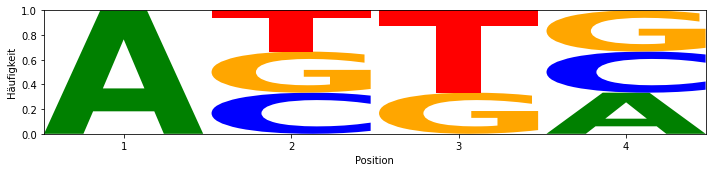

In [13]:
# OneHot encoding
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import logomaker
import pandas as pd

encoder = OneHotEncoder(sparse=False).fit([['A'],['C'],['G'],['T']])
Seq_OH = np.array([encoder.transform(list(Seqh)) for Seqh in [map(list,Seqi) for Seqi in Sequenzen]])
PFM = np.sum(Seq_OH, axis=0)/len(Sequenzen)
PWM = np.log2(PFM / Anzahl / b)

# PWM = -PFM * np.log2(PFM)
print(PWM)

# Ri = np.log2(4) - np.nansum(PWM, axis=1)
# Height = Ri*PWM.T
# H_df = pd.DataFrame(Height.T, columns=['A','C','G','T']).fillna(0)
H_df = pd.DataFrame(PFM, columns=['A','C','G','T']).replace([-np.inf],0)
plot = logomaker.Logo(H_df)
plot.style_xticks(anchor=0, spacing=1)
# plot.ax.set_yticks([0, 1, 2])
plot.ax.set_ylabel('Häufigkeit')
plot.ax.set_xticklabels([1,2,3,4])
plot.ax.set_xlabel('Position')
plot.fig.tight_layout()
plot.fig.savefig('SeqLogo.png')

In [40]:
Exp=[5.2,10.5,50.1]
# Exp = exp_dat.iloc[myIdx].values
# Exp = data['Expression']
Exp_ar = np.array([np.tile(expi,(Seq_OH.shape[1],Seq_OH.shape[2],)) for expi in Exp])
Exp_OH = np.multiply(Seq_OH, Exp_ar)
Exp_OH[Exp_OH == 0.] = np.nan
Exp_mean = np.nanmean(Exp_OH, axis=0)
Exp_NormPos = Exp_mean/np.tile(np.nanmean(Exp_mean, axis=1),(4,1)).T

<ipython-input-40-3366635372e0>:7: RuntimeWarning: Mean of empty slice
  Exp_mean = np.nanmean(Exp_OH, axis=0)


In [52]:
Expr_df

A         C         G         T
0  1.000000  0.000000  0.000000  0.000000
1  0.000000  0.478723  0.237082  2.284195
2  0.000000  0.000000  1.729077  0.270923
3  0.237082  2.284195  0.478723  0.000000

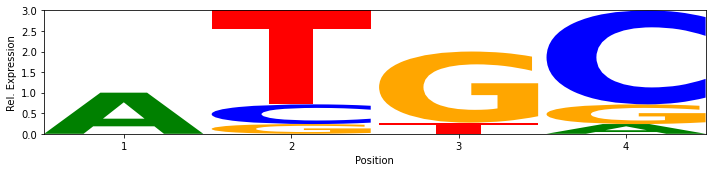

In [67]:
Expr_df = pd.DataFrame(Exp_NormPos, columns=['A','C','G','T']).fillna(0)
Expr_dd = pd.DataFrame(Exp_mean, columns=['A','C','G','T']).fillna(0)
plot = logomaker.Logo(Expr_df)
plot.style_xticks(anchor=0, spacing=1)
# plot.ax.set_yticks([0, 1, 2])
plot.ax.set_ylabel('Rel. Expression')
plot.ax.set_xlabel('Position')
plot.ax.set_xticklabels([1,2,3,4])
plot.fig.tight_layout()
plot.fig.savefig('ExpressLogo.png')

## Cross validation

In [ ]:
from sklearn.model_selection import LeaveOneOut
Daten = ['Seq1','Seq2','Seq3','Seq4']
loo = LeaveOneOut()
[print('{} {}'.format(train, test)) for train, test in loo.split(Daten)];

In [ ]:
from sklearn.model_selection import LeavePOut
Daten = ['Seq1','Seq2','Seq3','Seq4']
lpo = LeavePOut(p=2)
[print('{} {}'.format(train, test)) for train, test in lpo.split(Daten)];

In [9]:
from sklearn.model_selection import KFold
Daten = ['Seq1','Seq2','Seq3','Seq4']
kf = KFold(n_splits=2)
[print('{} {}'.format(train, test)) for train, test in kf.split(Daten)];

[2 3] [0 1]
[0 1] [2 3]


In [ ]:
from sklearn.model_selection import LeaveOneGroupOut
Daten = ['Seq1','Seq2','Seq3','Seq4']
Sequenzen = ['AGTA','ACTG','ATGC','AGTA']
logo = LeaveOneGroupOut()
[print('{} {}'.format(train, test)) for train, test in logo.split(Daten, groups=Sequenzen)];

In [ ]:
from sklearn.model_selection import GroupShuffleSplit
Daten = ['Seq1','Seq2','Seq3','Seq4']
Sequenzen = ['AGTA','ACTG','ATGC','AGTA']
gss = GroupShuffleSplit(n_splits=2)
[print('{} {}'.format(train, test)) for train, test in gss.split(Daten, groups=Sequenzen)];

## Decision Trees and Random Forest
### Illustratives einfaches Beispiel mit Genexpression

In [1]:
# Daten
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
Daten = ['Lactate','ADH','XYZ','MNO']
Sequenzen = ['AGTA','ACTG','ATGC','AGTA']
Y=[5.2,10.5,50.1,7.5]

In [4]:
# Durchschnitt und Standardabweichung
Mittel = round(np.mean(Y),1)
Stabw = round(np.std(Y),1)
print('Mittel: {}\nStandardabweichung: {}'.format(Mittel,Stabw))

Mittel: 18.3
Standardabweichung: 18.4


In [4]:
encoder = OneHotEncoder(sparse=False).fit([['A'],['C'],['G'],['T']])
Seq_OH = np.array([encoder.transform(list(Seqh)) for Seqh in [map(list,Seqi) for Seqi in Sequenzen]])

Sequence_Samples, Sequence_Positions, Sequence_Bases = np.array(Seq_OH).shape
X = np.array(Seq_OH).reshape(Sequence_Samples,Sequence_Positions*Sequence_Bases)

print(pd.DataFrame(np.arange(Sequence_Positions*Sequence_Bases).reshape(-1,4), columns=['A','C','G','T']))

    A   C   G   T
0   0   1   2   3
1   4   5   6   7
2   8   9  10  11
3  12  13  14  15


In [5]:
from sklearn.tree import DecisionTreeRegressor, export_text

Tree = DecisionTreeRegressor()
Tree.fit(X,Y)
print(export_text(Tree))

|--- feature_11 <= 0.50
|   |--- value: [50.10]
|--- feature_11 >  0.50
|   |--- feature_14 <= 0.50
|   |   |--- value: [6.35]
|   |--- feature_14 >  0.50
|   |   |--- value: [10.50]



### Reales Beispiel mit Expressionsdaten von Rhodius et al.

In [7]:
# Laden der Daten
# Laden von Bibliotheken
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
data = pd.read_csv('Rhodius2010.csv')
# Die ersten fünf Zeilen der Variable werden Ausgegeben.
# print(data.head())


encoder = OneHotEncoder(sparse=False).fit([['A'],['C'],['G'],['T']])
Seq_OH = np.array([encoder.transform(list(Seqh)) for Seqh in [map(list,Seqi) for Seqi in data['Sequence']]])

Sequence_Samples, Sequence_Positions, Sequence_Bases = np.array(Seq_OH).shape
X = np.array(Seq_OH).reshape(Sequence_Samples,Sequence_Positions*Sequence_Bases)
Y = data['Expression']

print(pd.DataFrame(np.arange(Sequence_Positions*Sequence_Bases).reshape(-1,4), columns=['A','C','G','T']))



      A    C    G    T
0     0    1    2    3
1     4    5    6    7
2     8    9   10   11
3    12   13   14   15
4    16   17   18   19
5    20   21   22   23
6    24   25   26   27
7    28   29   30   31
8    32   33   34   35
9    36   37   38   39
10   40   41   42   43
11   44   45   46   47
12   48   49   50   51
13   52   53   54   55
14   56   57   58   59
15   60   61   62   63
16   64   65   66   67
17   68   69   70   71
18   72   73   74   75
19   76   77   78   79
20   80   81   82   83
21   84   85   86   87
22   88   89   90   91
23   92   93   94   95
24   96   97   98   99
25  100  101  102  103
26  104  105  106  107
27  108  109  110  111
28  112  113  114  115
29  116  117  118  119
30  120  121  122  123
31  124  125  126  127
32  128  129  130  131
33  132  133  134  135
34  136  137  138  139


In [12]:
# Datenaufteilung Train/Test
from sklearn.model_selection import ShuffleSplit, GridSearchCV, cross_val_score

TestSet = int(.1*Sequence_Samples)
ss = ShuffleSplit(n_splits=TestSet)
[print('{} {}'.format(train, test)) for train, test in gss.split(Daten, groups=Sequenzen)];

# GridTree = GridSearchCV(Tree, cv=gss)
cross_val_score(Tree, X, Y, cv=ss)
# model = Tree.fit()


[1 2] [0 3]
[0 1 3] [2]


array([  -1.02976909,   -0.25767344,   -0.26860307,   -0.44813551,
        -12.46524193, -172.08681662])

## Entscheidungsbaum

In [4]:
import numpy as np
np.sqrt(77**2+29**2)

82.28000972289685

## Metriken

In [76]:
ysimMB

array([array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0], dtype=object)

In [78]:
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef

yexp = np.array([np.zeros(10), np.zeros(10)+1]).flatten()
ysimMA = np.array([0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0])
ysimMB = np.array([0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0]).flatten()
target_names = ['Niedrig', 'Hoch']
print(classification_report(yexp, ysimMA, target_names=target_names))
print('Matthews:', matthews_corrcoef(yexp,ysimMA))

              precision    recall  f1-score   support

     Niedrig       0.89      0.80      0.84        10
        Hoch       0.82      0.90      0.86        10

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.85      0.85      0.85        20

Matthews: 0.7035264706814485
